In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Helper Functions

In [3]:
def extract_dfs_cols(path, cols, state):
    return [[state+" "+file[-8:-4], pd.read_csv(file, usecols=cols)] for file in glob.glob(path)]

def extract_dfs(path, state):
    return [[state+" "+file[-8:-4], pd.read_csv(file)] for file in sorted(glob.glob(path))]

def sub_dfs(dfs, cols):
    return [[df[0], df[1][cols]] for df in dfs]

def print_frequent_items(dfs, col):
    [print(df[0], ": ", df[1][col].mode().tolist()[0]) for df in dfs]

def map_reduce(dfs, col_one, col_financial):
    reduced_dfs = []
    
    for df in dfs:
        reduced_df = df[1].groupby(by=[col_one], as_index = False)[col_financial].sum()
        reduced_df.name = df[0]
        reduced_dfs.append(reduced_df)
    
    return reduced_dfs

def convert_notation(dfs, new_col, old_col):
    converted_dfs = []
    
    for df in dfs:
        df[new_col] = df[old_col].astype(int)
        df.drop([old_col], 1, inplace = True)
        df_new = df.sort_values(by=[new_col], ascending = False)
        df_new.name = df.name.capitalize()
        converted_dfs.append(df_new)
    
    return converted_dfs

def display_top_Nrow(dfs, N):
    for df in dfs:
        print(df.name)
        display(df.head(N))
        
def return_plot_lists(df, col_x, col_y):
    return df[col_x].tolist(), df[col_y].tolist()

def plot_line_costs(dfs, contains):
    x = [(df.name[-4:]) for df in dfs]
    y = [(df[df[col].str.contains(contains)]['cost'].tolist()[0]/1000000) for df in dfs]
    plt.plot(x,y)
    plt.xlabel('Time YRS')
    plt.ylabel('$ Millions')
    plt.title(contains + " AWARDS")
    plt.savefig("figures/colorado/specific_agencies/" + contains + " AWARDS")

# Store DFs

In [4]:
colorado_dfs = extract_dfs('final_project/mohd_work/datasets/colorado/*.csv', 'colorado')
arizona_dfs = extract_dfs('final_project/mohd_work/datasets/arizona/*.csv', 'arizona')

In [5]:
len(colorado_dfs)

9

# Most Frequent Awards

In [7]:
awards_colorado = sub_dfs(colorado_dfs, ['total_funding_amount', 'award_description'])
awards_arizona = sub_dfs(arizona_dfs, ['total_funding_amount', 'award_description'])

In [8]:
print_frequent_items(awards_colorado, 'award_description')
print()
print_frequent_items(awards_arizona, 'award_description')

colorado 2010 :  GRANT PROGRAM
colorado 2011 :  GRANT PROGRAM
colorado 2012 :  GRANT PROGRAM
colorado 2013 :  GRANT PROGRAM
colorado 2014 :  GRANT PROGRAM
colorado 2015 :  GRANT PROGRAM
colorado 2016 :  GRANT PROGRAM
colorado 2017 :  UNKNOWN TITLE
colorado 2018 :  PRICE LOSS COVERAGE PROGRAM

arizona 2010 :  GRANT PROGRAM
arizona 2011 :  GRANT PROGRAM
arizona 2012 :  GRANT PROGRAM
arizona 2013 :  GRANT PROGRAM
arizona 2014 :  GRANT PROGRAM
arizona 2015 :  GRANT PROGRAM
arizona 2016 :  GRANT PROGRAM
arizona 2017 :  UNKNOWN TITLE
arizona 2018 :  UNKNOWN TITLE


# Most Frequent Awarding Agency

In [9]:
col = 'awarding_agency_name'
col_money = 'total_funding_amount'

In [10]:
agency_colorado = sub_dfs(colorado_dfs, [col_money, col])
agency_arizona = sub_dfs(arizona_dfs, [col_money, col])

In [11]:
print_frequent_items(agency_colorado, col)
print()
print_frequent_items(agency_arizona, col)

colorado 2010 :  DEPARTMENT OF EDUCATION (ED)
colorado 2011 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2012 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2013 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2014 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2015 :  DEPARTMENT OF EDUCATION (ED)
colorado 2016 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2017 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2018 :  DEPARTMENT OF AGRICULTURE (USDA)

arizona 2010 :  DEPARTMENT OF EDUCATION (ED)
arizona 2011 :  DEPARTMENT OF EDUCATION (ED)
arizona 2012 :  DEPARTMENT OF EDUCATION (ED)
arizona 2013 :  DEPARTMENT OF EDUCATION (ED)
arizona 2014 :  DEPARTMENT OF EDUCATION (ED)
arizona 2015 :  DEPARTMENT OF EDUCATION (ED)
arizona 2016 :  DEPARTMENT OF EDUCATION (ED)
arizona 2017 :  DEPARTMENT OF EDUCATION (ED)
arizona 2018 :  DEPARTMENT OF EDUCATION (ED)


## Colorado Awarding Agencies

In [12]:
display((agency_colorado[1][1].head(3)))

,total_funding_amount,awarding_agency_name
0,441.0,DEPARTMENT OF AGRICULTURE (USDA)
1,5875.0,DEPARTMENT OF AGRICULTURE (USDA)
2,1412.0,DEPARTMENT OF AGRICULTURE (USDA)


In [13]:
colorado_reduced = map_reduce(agency_colorado, col, col_money) 
converted_reduced_colorado = convert_notation(colorado_reduced, 'cost', col_money)

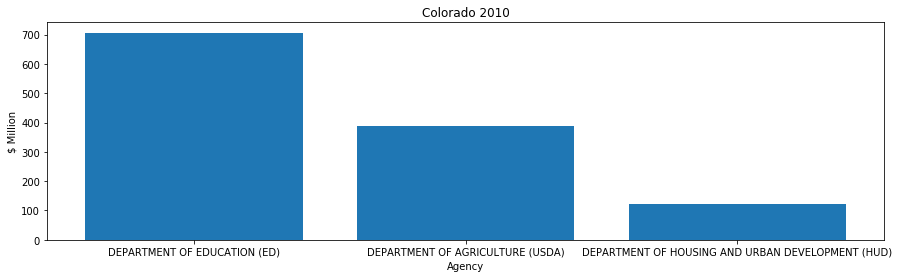

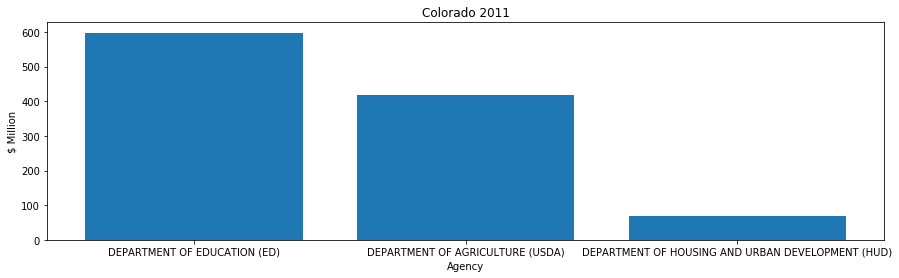

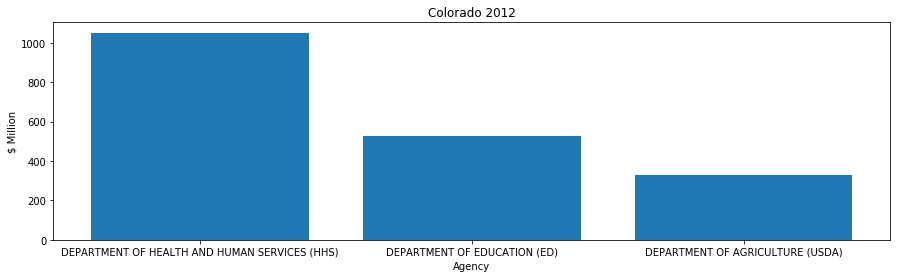

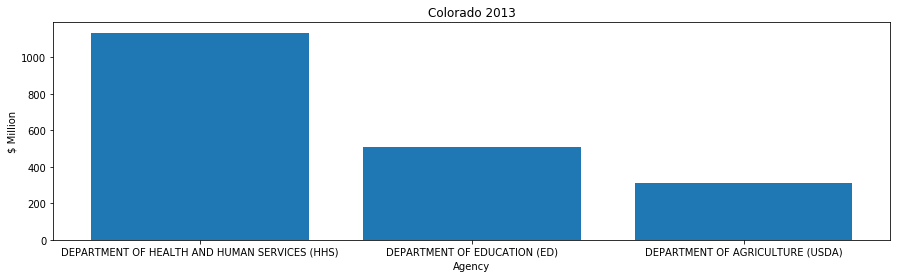

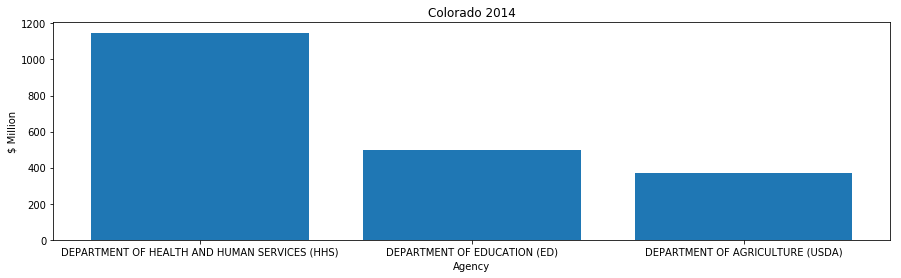

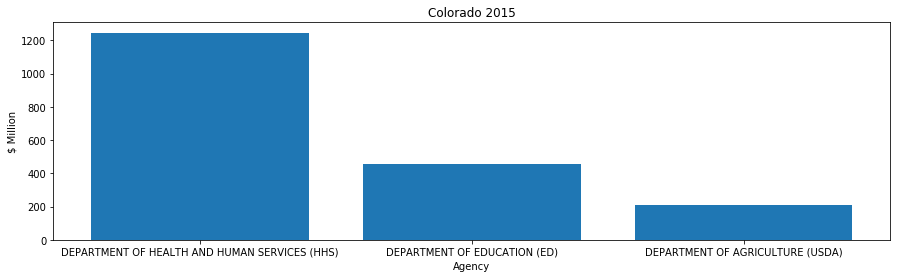

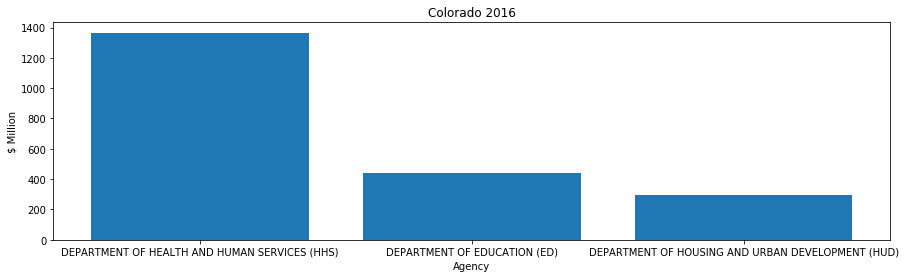

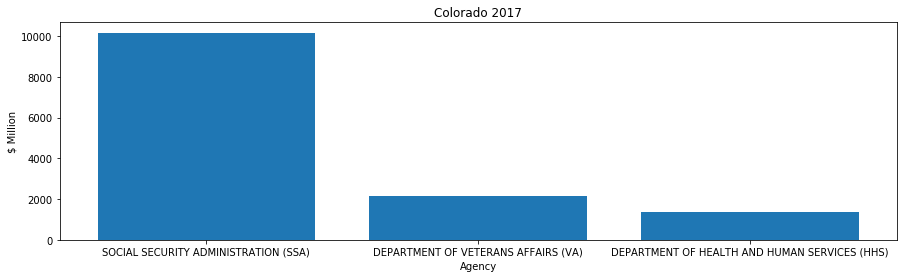

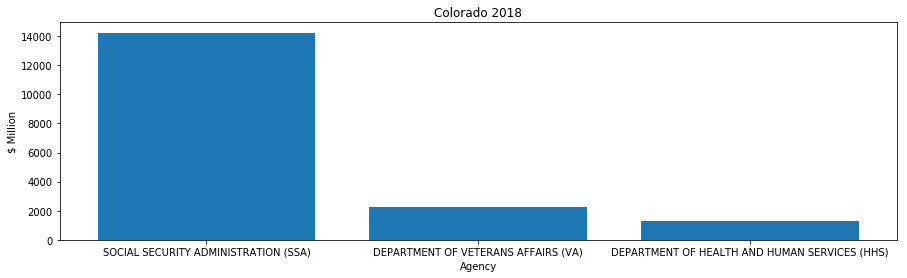

In [14]:
for df in converted_reduced_colorado:
    f, ax = plt.subplots(figsize=(15,4))
    
    # divide each element in the cost list by a million
    y = [elem/1000000 for elem in df['cost'].tolist()[:3]]
    
    plt.bar(df[col].tolist()[:3], y)
    plt.xlabel('Agency')
    plt.ylabel('$ Million')
    plt.title(df.name)
    plt.savefig("figures/colorado/agency_awards/" + df.name)

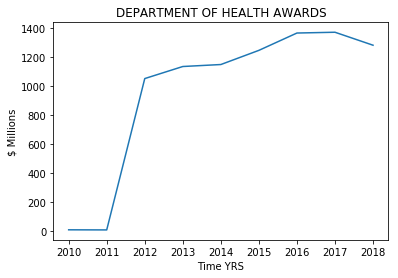

In [29]:
plot_line_costs(converted_reduced_colorado, 'DEPARTMENT OF HEALTH')

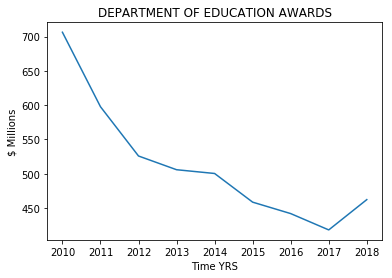

In [16]:
plot_line_costs(converted_reduced_colorado, 'DEPARTMENT OF EDUCATION')

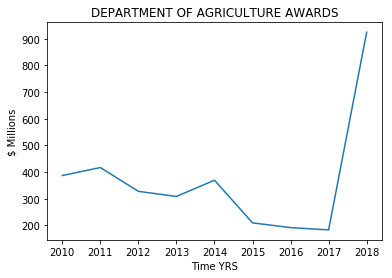

In [17]:
plot_line_costs(converted_reduced_colorado, 'DEPARTMENT OF AGRICULTURE')

## Arizona Awarding Agencies

In [21]:
display((agency_arizona[1][1].head(3)))

,total_funding_amount,awarding_agency_name
0,533.0,DEPARTMENT OF AGRICULTURE (USDA)
1,443.0,DEPARTMENT OF AGRICULTURE (USDA)
2,1597.0,DEPARTMENT OF AGRICULTURE (USDA)


In [24]:
arizona_reduced = map_reduce(agency_arizona, col, col_money) 
converted_reduced_arizona = convert_notation(arizona_reduced, 'cost', col_money)

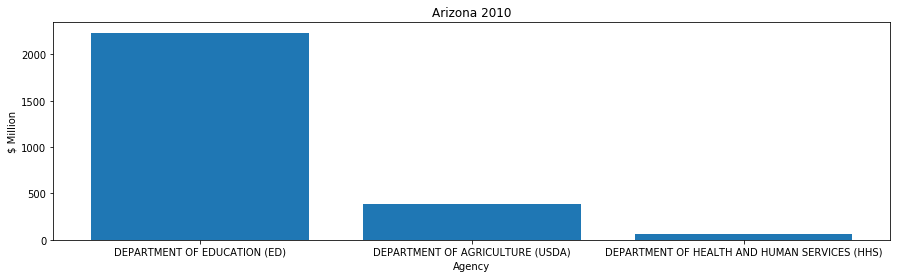

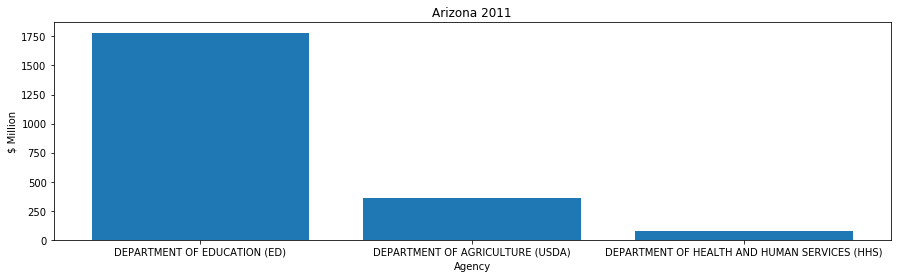

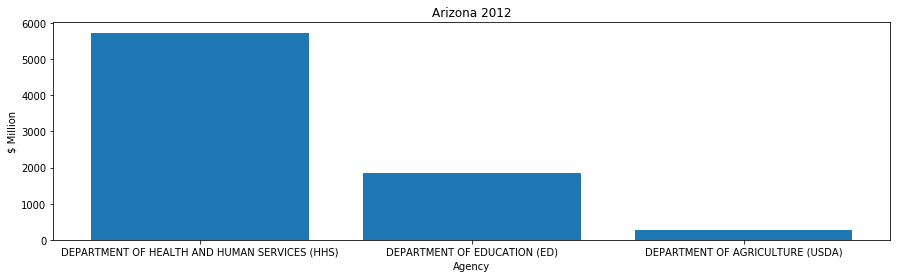

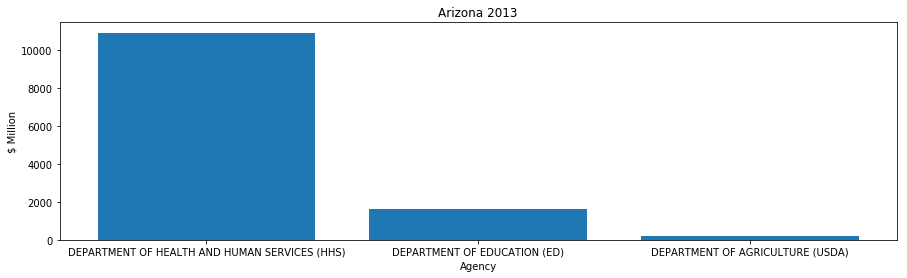

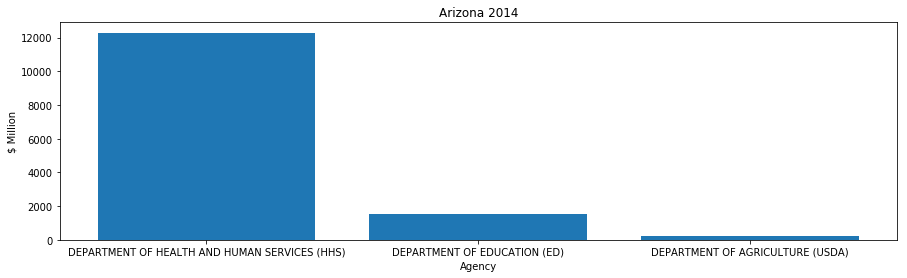

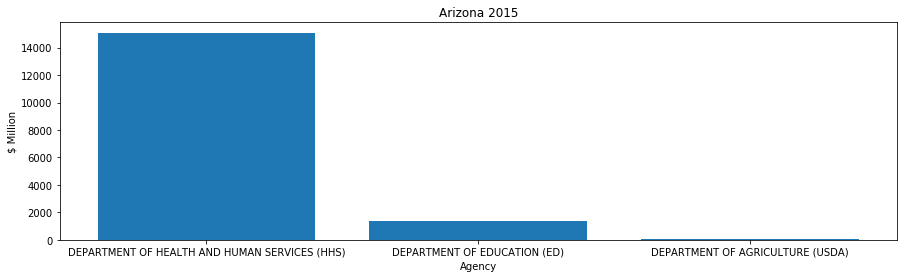

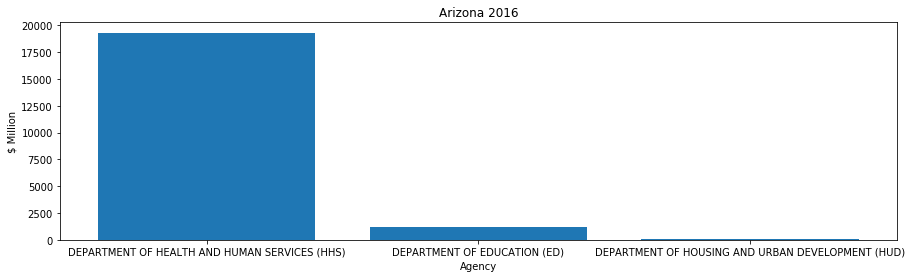

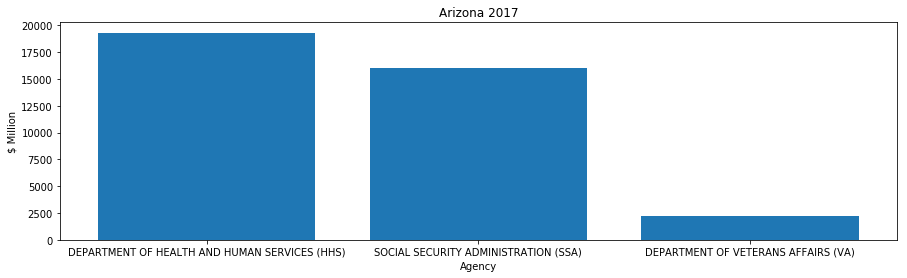

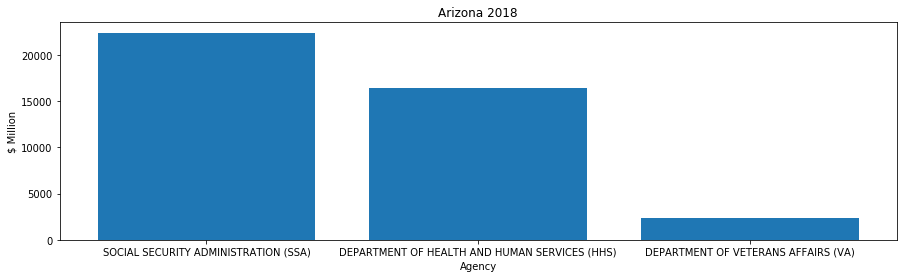

In [27]:
for df in converted_reduced_arizona:
    f, ax = plt.subplots(figsize=(15,4))
    
    # divide each element in the cost list by a million
    y = [elem/1000000 for elem in df['cost'].tolist()[:3]]
    
    plt.bar(df[col].tolist()[:3], y)
    plt.xlabel('Agency')
    plt.ylabel('$ Million')
    plt.title(df.name)
    plt.savefig("figures/arizona/agency_awards/" + df.name)

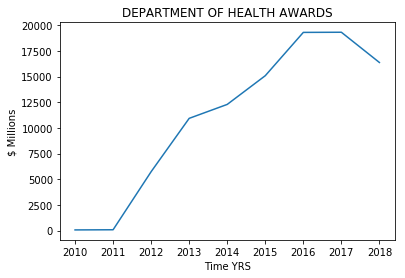

In [30]:
plot_line_costs(converted_reduced_arizona, 'DEPARTMENT OF HEALTH')

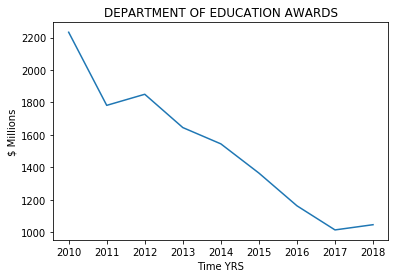

In [31]:
plot_line_costs(converted_reduced_arizona, 'DEPARTMENT OF EDUCATION')

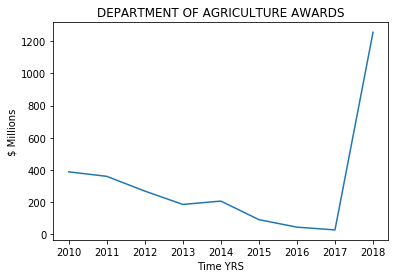

In [34]:
plot_line_costs(converted_reduced_arizona, 'DEPARTMENT OF AGRICULTURE')